In [5]:
#loading Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [7]:
#load the dataset
df = pd.read_csv("Customer Purchase Data.csv")
#droping null values if there are any
df.dropna()
#Head of data frame
df.head()

,Number,Age,Income,Spending_Score,Membership_Years,Purchase_Frequency,Last_Purchase_Amount
0,1,56,61350.84215,12372.864450,15,77.685590,6232.122440
1,2,46,53777.18224,11001.604230,10,51.858351,5545.849698
2,3,32,39460.32263,8007.385018,19,98.166371,4054.645293
3,4,60,66672.12210,13526.548370,12,62.530976,6815.544393
4,5,38,44459.08553,9059.304083,9,46.470533,4617.833484


In [9]:
#conversion of floatig number to intergers
def convertion_floating_to_int(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = df[column].round().astype(int)
    return df

df = convertion_floating_to_int(df, columns=['Income', 'Purchase_Frequency', 'Spending_Score', 'Last_Purchase_Amount'])
df.head()

,Number,Age,Income,Spending_Score,Membership_Years,Purchase_Frequency,Last_Purchase_Amount
0,1,56,61351,12373,15,78,6232
1,2,46,53777,11002,10,52,5546
2,3,32,39460,8007,19,98,4055
3,4,60,66672,13527,12,63,6816
4,5,38,44459,9059,9,46,4618


In [11]:
# Define functions for each plot and statistics

def summary_statistics(df):
    """Summery Statistic of data mean,median and mode"""
    summary = df.describe(include='all').T
    summary['mean'] = df.mean()
    summary['median'] = df.median()
    summary['mode'] = df.mode().iloc[0]
    return summary

print("Summary Statistics:")
print(summary_statistics(df))

x = df['Age'].values
y = df['Last_Purchase_Amount'].values

Summary Statistics:
                       count          mean           std      min       25%  \
Number                1362.0    681.500000    393.319844      1.0    341.25   
Age                   1362.0     43.251836     12.533236     18.0     33.00   
Income                1362.0  48317.191630  12648.640869  19947.0  38532.00   
Spending_Score        1362.0   9765.388399   2531.121944   4064.0   7831.00   
Membership_Years      1362.0      9.513950      5.417624      1.0      5.00   
Purchase_Frequency    1362.0     49.551395     27.078720      5.0     27.00   
Last_Purchase_Amount  1362.0   4931.698972   1266.911849   2058.0   3962.50   

                          50%       75%      max   median     mode  
Number                  681.5   1021.75   1362.0    681.5      1.0  
Age                      43.0     54.00     64.0     43.0     43.0  
Income                48758.5  58580.00  73183.0  48758.5  37052.0  
Spending_Score         9850.0  11810.00  14792.0   9850.0   8123.0  
Me

In [13]:
#clustering
ncluster = 3
kmeans = KMeans(n_clusters=ncluster, n_init=20)
xy = df[['Age', 'Last_Purchase_Amount']]
nclust = kmeans.fit_predict(xy)

centers = kmeans.cluster_centers_
xkmeans = centers[:, 0]
ykmeans = centers[:, 1]

In [15]:
#defining Center
true_centers = np.array([[25, 2000], [45, 4000], [65, 6000]])
xcent = true_centers[:, 0]
ycent = true_centers[:, 1]

# Generate a color map for clusters
colours = plt.cm.Set1(np.linspace(0, 1, len(np.unique(nclust))))
cmap = ListedColormap(colours)

def plot_fitted_clusters():
    """
    Plots clustered data as a scatter plot with true and estimated centers.
    """
    fig, ax = plt.subplots(dpi=144)
    s = ax.scatter(x, y, c=nclust, cmap=cmap, marker='o', label='Data')
    ax.plot(xkmeans, ykmeans, 'bs', ms=9, label='Estimated Centres')  # Blue squares on top
    ax.plot(xkmeans, ykmeans, 'kD', ms=10, alpha=0.7, label='True Centres')  # Black diamonds below
    cbar = fig.colorbar(s, ax=ax)
    cbar.set_ticks(np.unique(nclust))
    ax.legend(fontsize=10, loc='lower right')
    plt.title("Scatter Plot with True and Estimated Center")
    ax.set_xlabel('Age')
    ax.set_ylabel('Last Purchase Amount')
    plt.show()

def plot_histogram():
    """Plots the Histogram of Age frequency."""
    plt.figure(figsize=(8, 5))
    plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
    plt.title("Histogram of Age Frequency")
    plt.xlabel("Age")
    plt.ylabel('Frequency')
    plt.show()

def plot_boxplot(data):
    """Plots a box plot for the Income , Last_Purchase_Amount and Spending_Score."""
    sns.boxplot(data=df[['Income', 'Last_Purchase_Amount', 'Spending_Score']])
    plt.title("Boxplot of Income,Last_Purchase_Amount and Spending_Score")
    plt.ylabel("Score", fontweight='bold')
    plt.show()

def plot_elbow(features):
    
    """
    Plots the elbow method.
    """
    inertia = []
    cluster_range = range(1, 11)
    for k in cluster_range:
        kmeans_model = KMeans(n_clusters=k, random_state=42).fit(features)
        inertia.append(kmeans_model.inertia_)
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, inertia, marker='o')
    plt.title('Elbow method Plot')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()
def plot_pairplot(csv_file, index_col, corner=True):
    
    df_eu = pd.read_csv(csv_file, index_col=index_col)
    # Convert all columns to numeric
    for col in df_eu.columns:
        df_eu[col] = pd.to_numeric(df_eu[col], errors='coerce')
    sns.pairplot(df_eu, corner=corner)
    plt.show()

def perform_linear_regression(data, x_col, y_col):
    """
    Plots the linear regression Between Age Vs Income.
    """
    x = data[[x_col]]
    y = data[y_col]
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, color='blue', label='Actual Data')
    plt.plot(x, y_pred, color='red', label='Fitted Line')
    plt.title(f'Linear Regression: {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.grid(True)
    plt.show()
    return model.coef_[0], model.intercept_ # Return slope and intercept

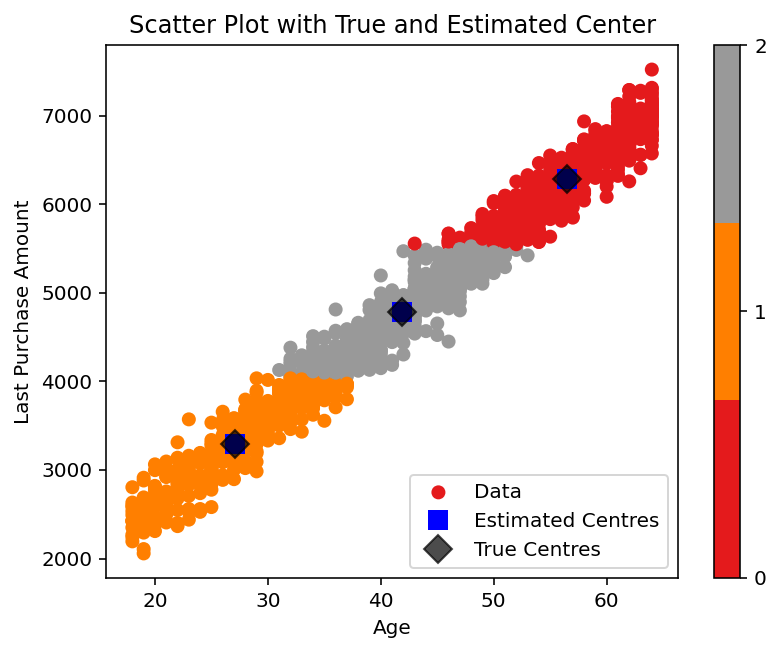

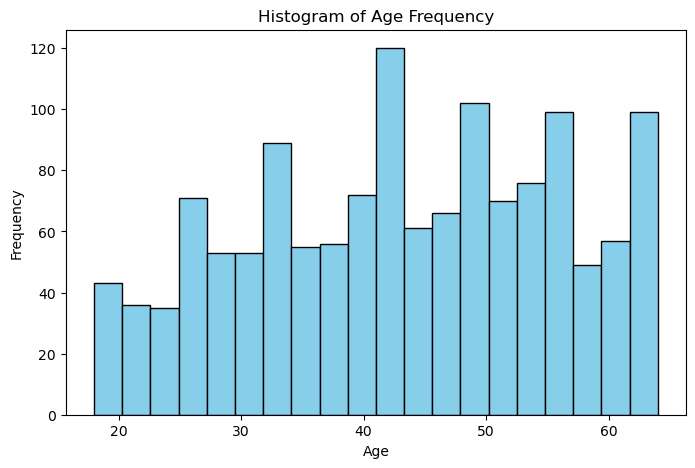

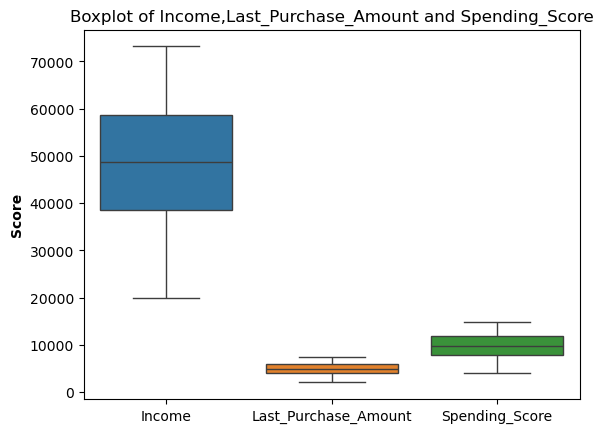

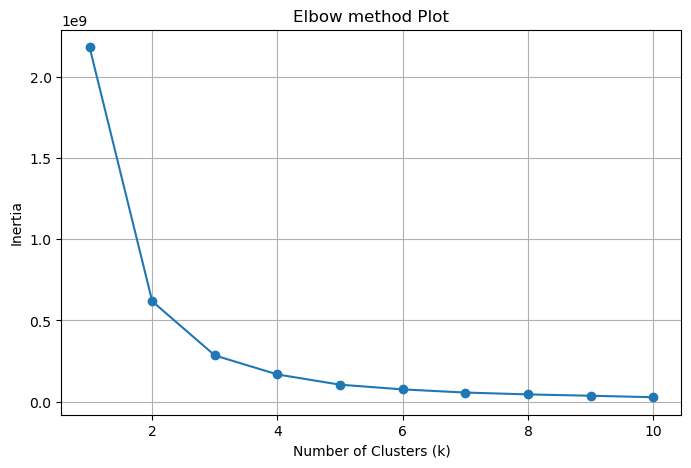

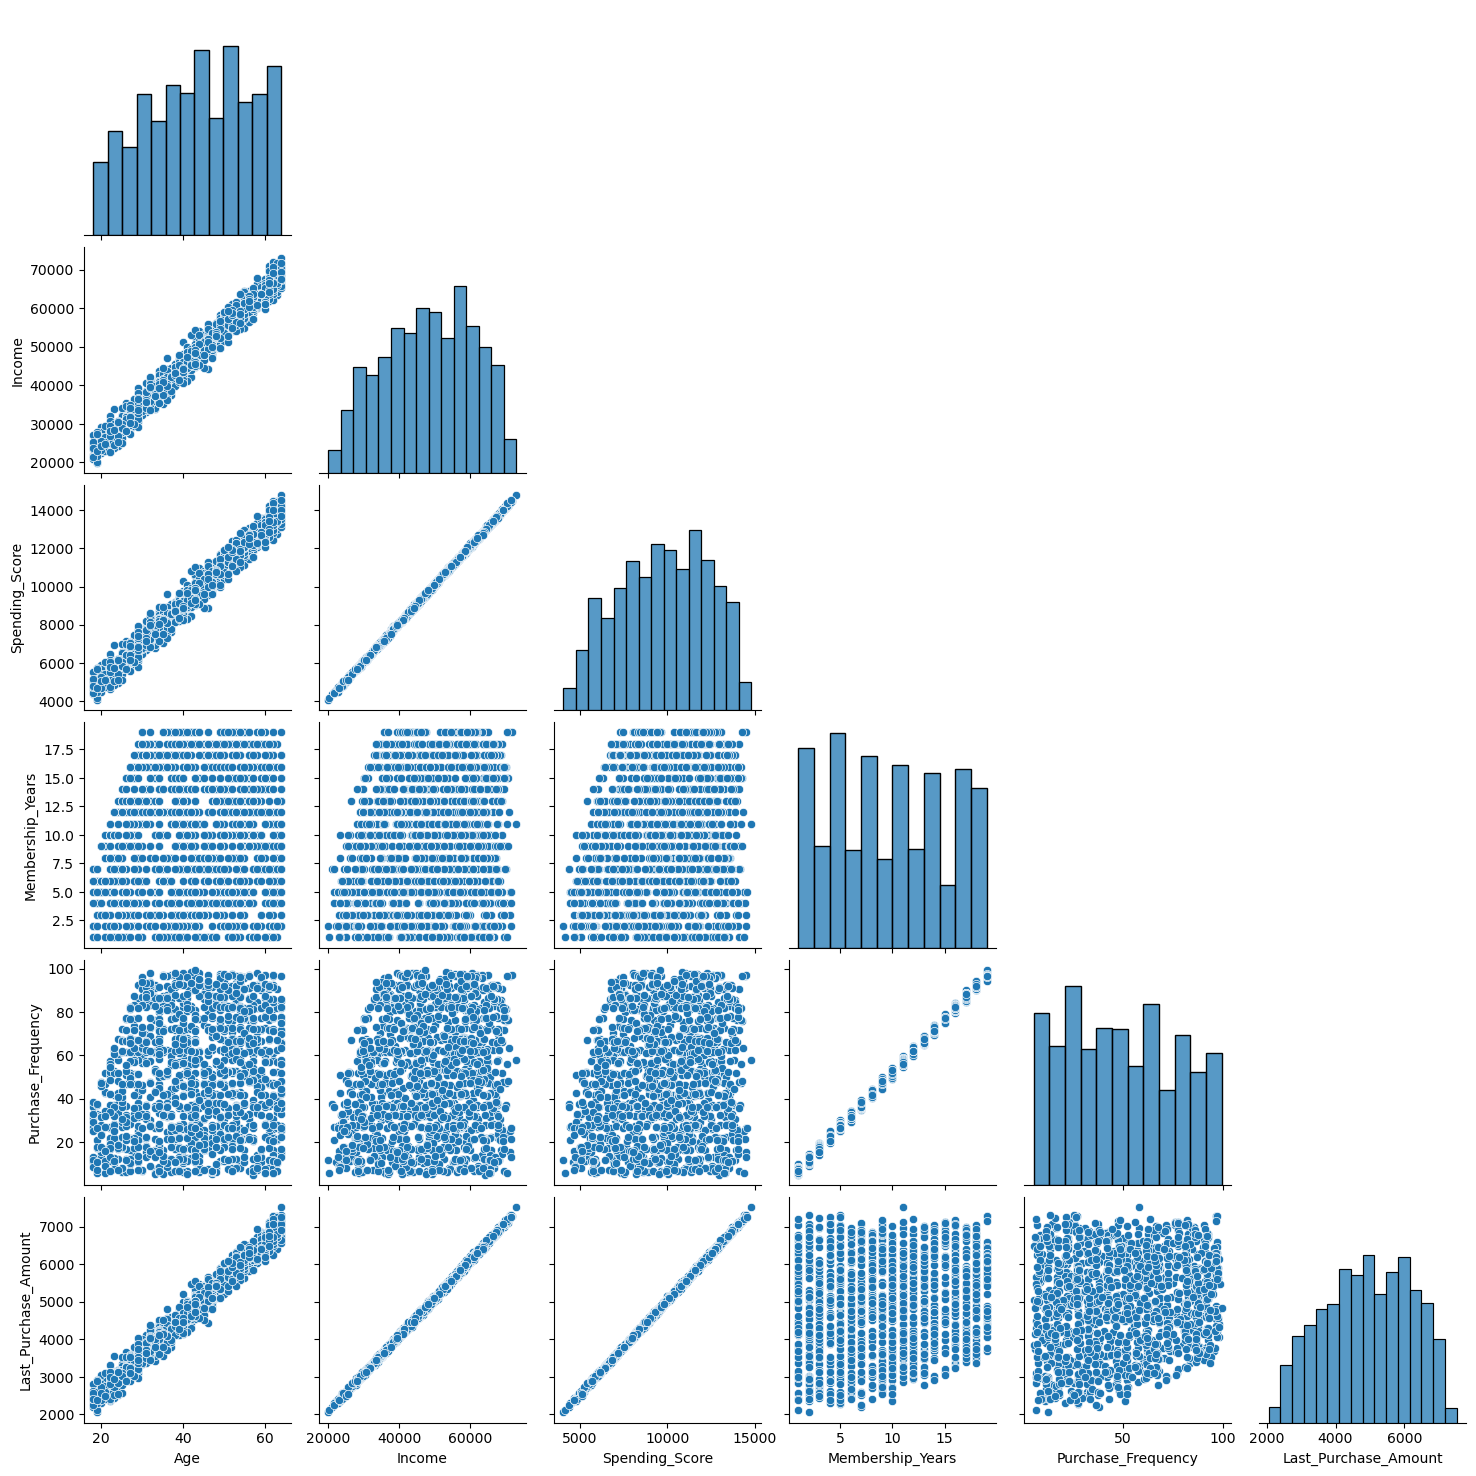

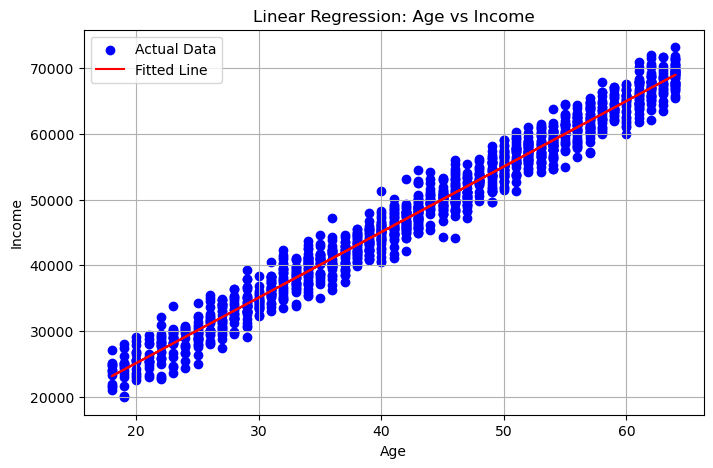

Linear Regression Coefficient: 996.4436033182087
Linear Regression Intercept: 5219.1767783609685


In [17]:
#calling each function
plot_fitted_clusters()
plot_histogram()
plot_boxplot(df)
plot_elbow(df[['Age', 'Last_Purchase_Amount']])
plot_pairplot('Customer Purchase Data.csv', index_col='Number')
coef, intercept = perform_linear_regression(df, 'Age', 'Income')
print(f"Linear Regression Coefficient: {coef}")
print(f"Linear Regression Intercept: {intercept}")